# RNN - Recurrent Neural Network

## Aim: To implement RNN for text classification.

### Dataset used: It is a news headlines dataset classified into 4 classes namely:
  * politics         
  * medical          
  * entertainment    
  * sports           

In [ ]:
!pip install advertools -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install contractions -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install clean-text -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import advertools as adv
import re
import contractions
from cleantext import clean
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
class Preprocess:

  def __init__(self,text):
    self.ltext=text.lower()
    self.text=contractions.fix(self.ltext)
    self.stop_words=set(adv.stopwords['english'])

  def emoji(self):
    e_txt=clean(self.text, no_emoji=True)
    return e_txt

  def remove_quotes_brackets(self,text):
    self.text1=re.sub("[\"\'\(\)]", "", text)
    return self.text1

  def remove_punctuations(self,text):
    text1=re.sub(r"[^\w\s]", " ",text)
    return text1

  def tokenize(self,text):
    self.t_text=word_tokenize(text)
    return self.t_text

  def stop_word(self,text):
    self.sw=[]
    for i in text:
      if i not in self.stop_words:
        self.sw.append(i)
    return self.sw

  def preprocess(self):
    e_txt=self.emoji()
    q_text=self.remove_quotes_brackets(e_txt)
    p_text=self.remove_punctuations(q_text)
    t_text=self.tokenize(p_text)
    swtext=self.stop_word(t_text)
    word=' '.join(swtext)
    return word

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/text_classification_dataset.xlsx")
df.head()

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1162 non-null   object
 1   type    1162 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB


In [ ]:
df['type'].value_counts()

politics         345
medical          299
entertainment    260
sports           258
Name: type, dtype: int64

In [ ]:
def text(text):
  s=Preprocess(text)
  return s.preprocess()

In [ ]:
df['preprocess']=df['text'].apply(text)

In [ ]:
X=df['preprocess']

In [ ]:
Y=df['type']

In [ ]:
Y = pd.get_dummies(df['type']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1162, 4)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
token = Tokenizer()
token.fit_on_texts(x_train)
sequence = token.texts_to_sequences(x_train)
sequence_matrix = pad_sequences(sequence)

In [ ]:
size = len(token.word_index)
size

5161

In [ ]:
# Model

model = Sequential()
model.add(Embedding(input_dim=size+1,output_dim = 100))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         516200    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 527,020
Trainable params: 527,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(sequence_matrix,y_train,batch_size=80,epochs=15,validation_split=0.3)

Epoch 1/15
8/8 [==============================] - 2s 110ms/step - loss: 0.0620 - accuracy: 0.9930 - val_loss: 0.9604 - val_accuracy: 0.6393
Epoch 2/15
8/8 [==============================] - 0s 51ms/step - loss: 0.0689 - accuracy: 0.9895 - val_loss: 1.2100 - val_accuracy: 0.5697
Epoch 3/15
8/8 [==============================] - 0s 43ms/step - loss: 0.0295 - accuracy: 0.9982 - val_loss: 1.2970 - val_accuracy: 0.5369
Epoch 4/15
8/8 [==============================] - 0s 43ms/step - loss: 0.0384 - accuracy: 0.9895 - val_loss: 1.3928 - val_accuracy: 0.5779
Epoch 5/15
8/8 [==============================] - 0s 49ms/step - loss: 0.0261 - accuracy: 0.9947 - val_loss: 1.2060 - val_accuracy: 0.5697
Epoch 6/15
8/8 [==============================] - 0s 43ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.1894 - val_accuracy: 0.5410
Epoch 7/15
8/8 [==============================] - 0s 46ms/step - loss: 0.0148 - accuracy: 0.9982 - val_loss: 1.2882 - val_accuracy: 0.5656
Epoch 8/15
8/8 [==========

In [ ]:
token = Tokenizer()
token.fit_on_texts(x_test)
sequence = token.texts_to_sequences(x_test)
seq_mat = pad_sequences(sequence)

In [ ]:
model.evaluate(seq_mat,y_test)

11/11 [==============================] - 0s 6ms/step - loss: 2.5862 - accuracy: 0.2751


[2.586153984069824, 0.2750716209411621]

In [ ]:
pred = model.predict(seq_mat)

11/11 [==============================] - 0s 6ms/step


In [ ]:
print(y_test[0])
np.argmax(pred[0])

[0 1 0 0]


2

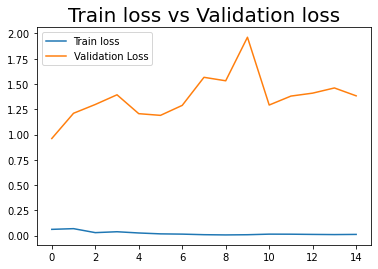

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train loss','Validation Loss'])
plt.title('Train loss vs Validation loss',fontsize=20)
plt.show()

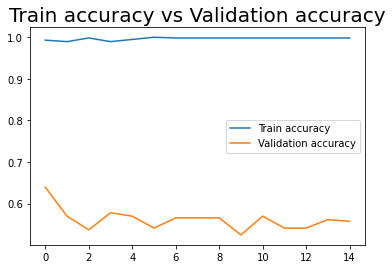

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train accuracy','Validation accuracy'])
plt.title('Train accuracy vs Validation accuracy',fontsize=20)
plt.show()

## Conclusion: The model has a train accuracy of 99%, validation accuracy of 55% and test accuracy of 27% which indiactes that the model is overfitting. Thus the model is not able to classify the new text correctly. The model needs to be further tuned for best fit.